In [ ]:
import sys
import os
sys.path.append(os.path.abspath("src"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from activation_simulations import (
    train_architecture_with_activation_functions,
    visualize_results
)

from classification import (
    load_data_classification,
    visualize_data_classification
)

In [2]:
def load_data(training_path, test_path, index_col=0):
    training=pd.read_csv(training_path, index_col=index_col)
    test=pd.read_csv(test_path, index_col=index_col)

    X_train, Y_train=training['x'].to_numpy().reshape(-1,1), training['y'].to_numpy().reshape(-1,1)
    X_test, Y_test=test['x'].to_numpy().reshape(-1,1), test['y'].to_numpy().reshape(-1,1)

    return X_train, Y_train, X_test, Y_test

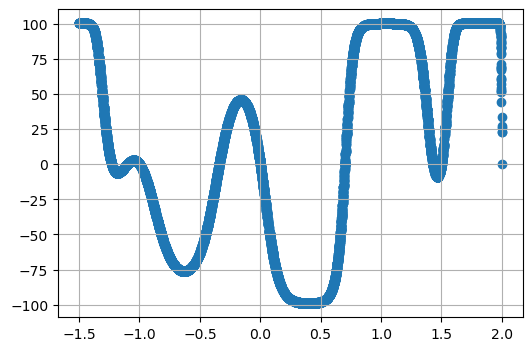

In [3]:
multimodal_large_training_path='data//multimodal-large-training.csv'
multimodal_large_test_path='data/multimodal-large-test.csv'

X_train_multimodal_large, Y_train_multimodal_large, X_test_multimodal_large, Y_test_multimodal_large=load_data(multimodal_large_training_path, multimodal_large_test_path, index_col=None)

plt.figure(figsize=(6, 4))
plt.grid(True)
plt.scatter(X_train_multimodal_large, Y_train_multimodal_large)

In [4]:
normalizer_multimodal_large = Normalizer()
X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized = normalizer_multimodal_large.fit_transform(X_train_multimodal_large, Y_train_multimodal_large)
X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized = normalizer_multimodal_large.transform(X_test_multimodal_large, Y_test_multimodal_large)

#### architecture with 1 hidden layer with 5 neurons

In [52]:
activations=['linear', 'sigmoid', 'tanh', 'relu']
#defining model parameters
task = 'regression'
layers = [1, 5, 1]
epochs = 1500
batch_size = 32
learning_rate = 0.1
optimizer = 'momentum'
results = train_architecture_with_activation_functions(activations=activations, task=task, layers=layers, epochs=epochs, 
                                             batch_size=batch_size, learning_rate=learning_rate, optimizer=optimizer,
                                             X_train=X_train_multimodal_large_normalized, Y_train=Y_train_multimodal_large_normalized,
                                             X_test=X_test_multimodal_large_normalized, Y_test=Y_test_multimodal_large_normalized,
                                             data_normalized=True, normalizer=normalizer_multimodal_large)

Training architecture with linear
Training architecture with sigmoid
Training architecture with tanh
Training architecture with relu


Architecture with layers: [1, 5, 1]


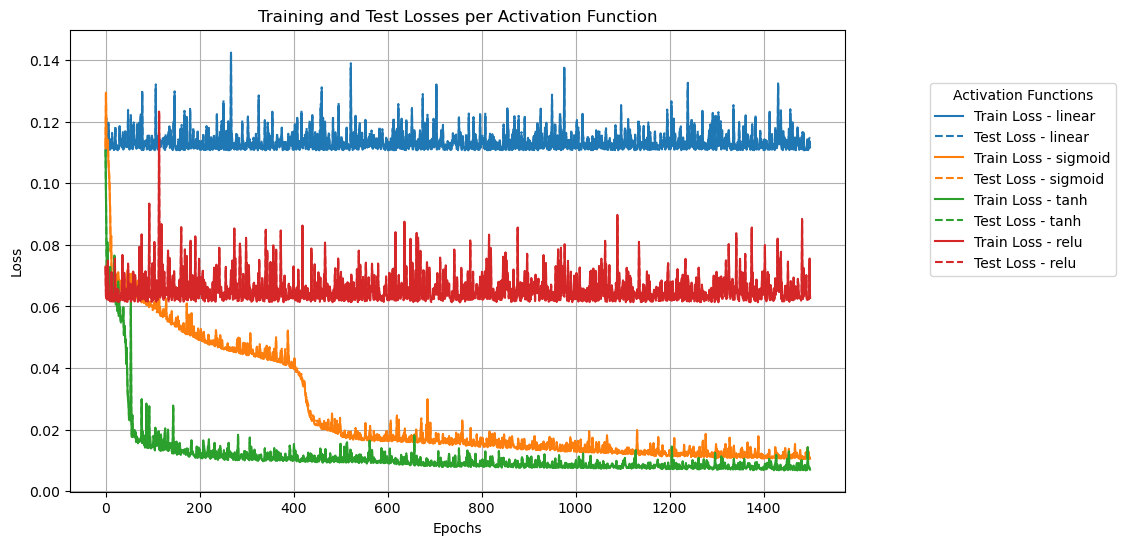

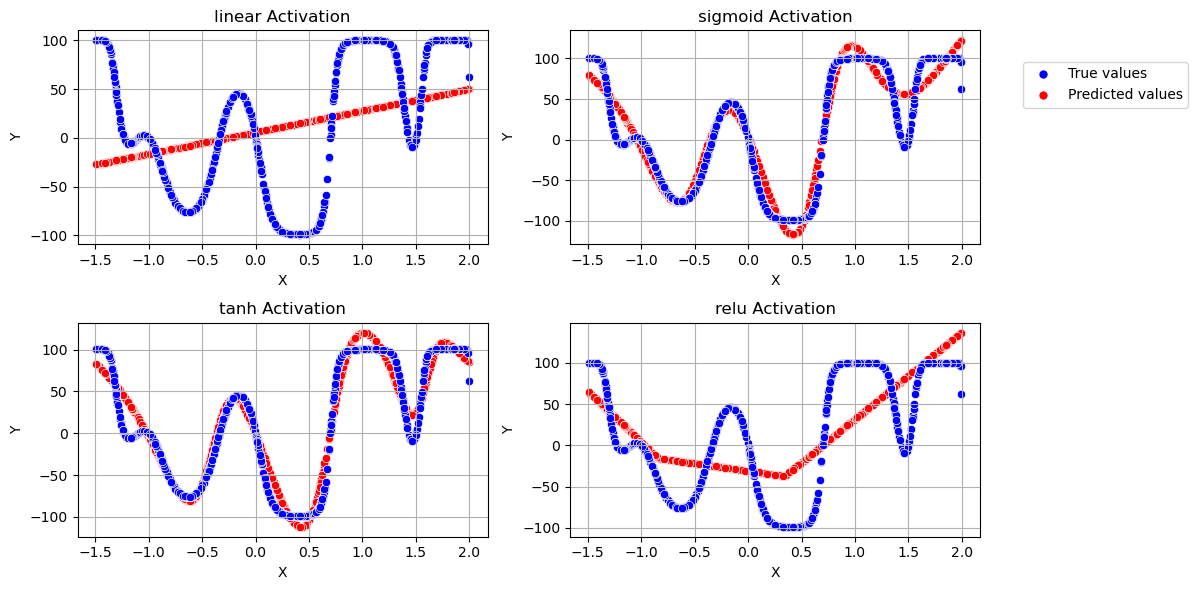

Regression Task Evaluation Metric per Activation Function


Training Time per Activation Function


In [53]:
print(f"Architecture with layers: {layers}")
visualize_results(task="regression", results=results, X_test=X_test_multimodal_large, Y_test=Y_test_multimodal_large)

The best results were achieved with the tanh and sigmoid activation functions, while the linear and ReLU functions performed significantly worse. As seen in the training loss plot, both linear and ReLU struggled to learn effectively.

Trying same thing with RMSprop optimization

In [50]:
activations=['linear', 'sigmoid', 'tanh', 'relu']
#defining model parameters
task = 'regression'
layers = [1, 5, 1]
epochs = 1500
batch_size = 32
learning_rate = 0.1
optimizer = 'RMSprop'
results = train_architecture_with_activation_functions(activations=activations, task=task, layers=layers, epochs=epochs, 
                                             batch_size=batch_size, learning_rate=learning_rate, optimizer=optimizer,
                                             X_train=X_train_multimodal_large_normalized, Y_train=Y_train_multimodal_large_normalized,
                                             X_test=X_test_multimodal_large_normalized, Y_test=Y_test_multimodal_large_normalized,
                                             data_normalized=True, normalizer=normalizer_multimodal_large)

Training architecture with linear
Training architecture with sigmoid
Training architecture with tanh
Training architecture with relu


Architecture with layers: [1, 5, 1]


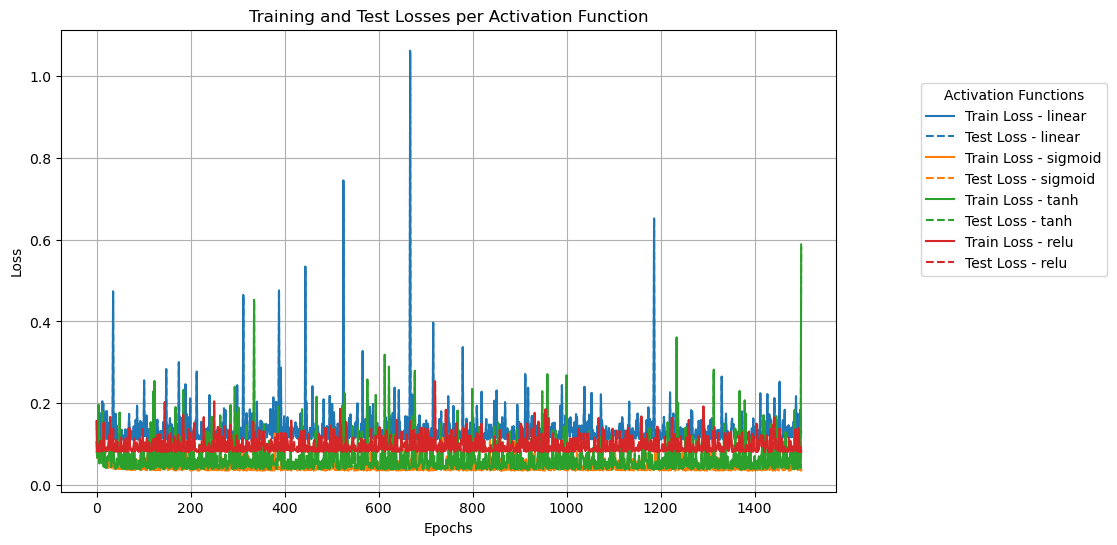

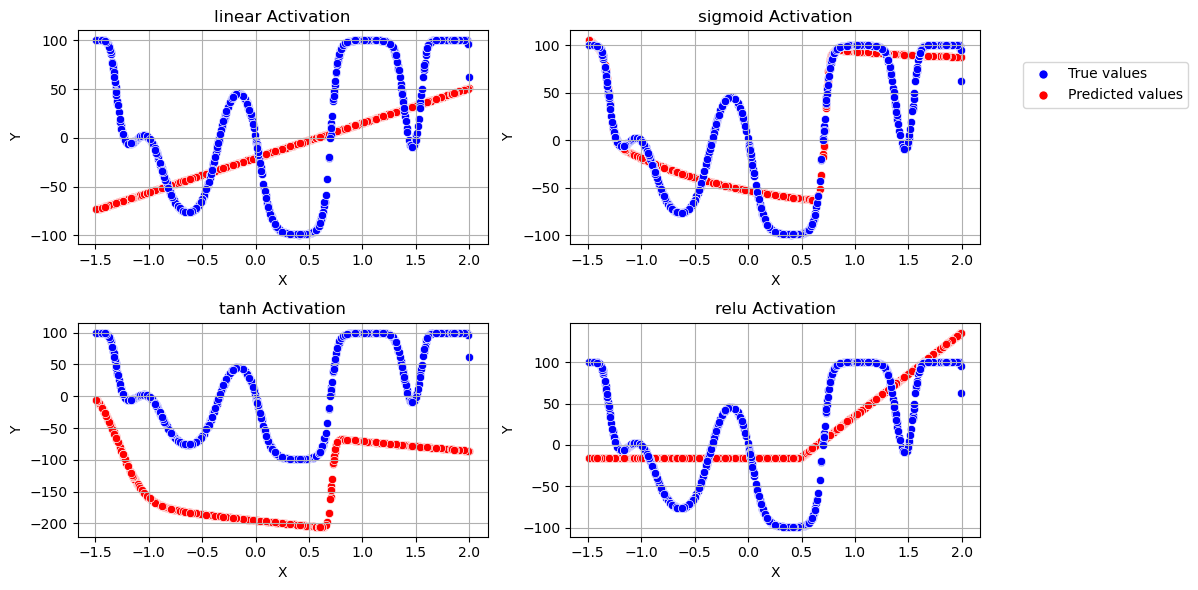

Regression Task Evaluation Metric per Activation Function


Training Time per Activation Function


In [51]:
print(f"Architecture with layers: {layers}")
visualize_results(task="regression", results=results, X_test=X_test_multimodal_large, Y_test=Y_test_multimodal_large)

Changing the optimizer from momentum to RMSprop did not yield better results, and none of the activation functions proved to be effective.

#### architecture with 2 hidden layers 5 neurons in each

In [56]:
activations=['linear', 'sigmoid', 'tanh', 'relu']
#defining model parameters
task = 'regression'
layers = [1, 5, 5, 1]
epochs = 1500
batch_size = 32
learning_rate = 0.1
optimizer = 'momentum'
results = train_architecture_with_activation_functions(activations=activations, task=task, layers=layers, epochs=epochs, 
                                             batch_size=batch_size, learning_rate=learning_rate, optimizer=optimizer,
                                             X_train=X_train_multimodal_large_normalized, Y_train=Y_train_multimodal_large_normalized,
                                             X_test=X_test_multimodal_large_normalized, Y_test=Y_test_multimodal_large_normalized,
                                             data_normalized=True, normalizer=normalizer_multimodal_large)

Training architecture with linear
Training architecture with sigmoid
Training architecture with tanh
Training architecture with relu


Architecture with layers: [1, 5, 5, 1]


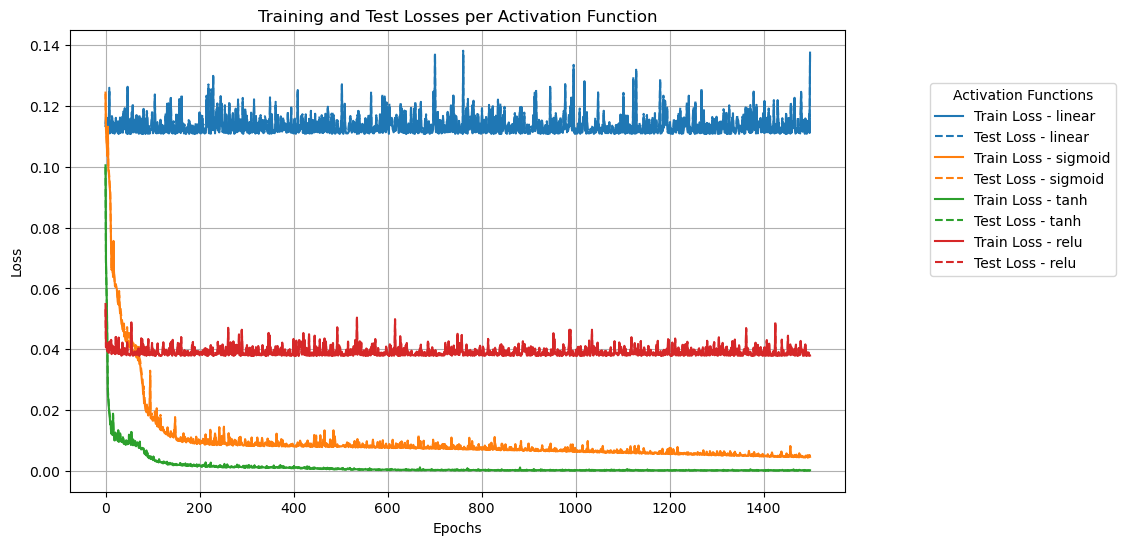

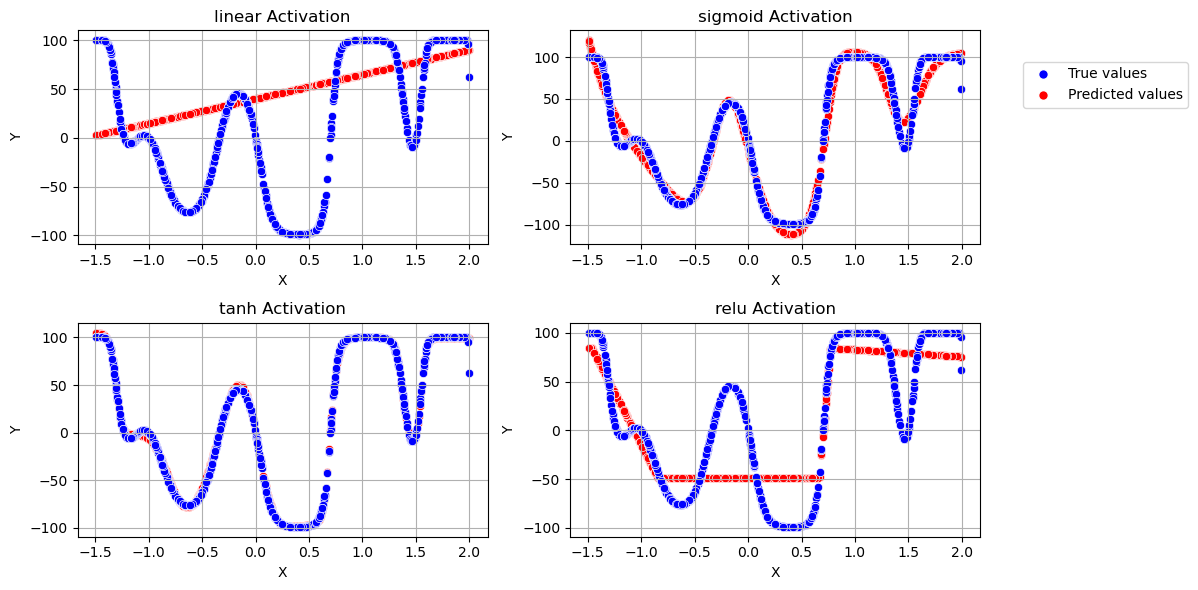

Regression Task Evaluation Metric per Activation Function


Training Time per Activation Function


In [57]:
print(f"Architecture with layers: {layers}")
visualize_results(task="regression", results=results, X_test=X_test_multimodal_large, Y_test=Y_test_multimodal_large)

Once again, the tanh activation function outperformed all others. However, when using the ReLU activation function, there is a notable difference in performance between the one-hidden-layer and two-hidden-layer architectures, with the latter showing better results. 

Sigmoid has the longest training time, likely due to the complexity of the function and its tendency to cause slower convergence, especially with deep networks.

#### architecture with 3 hidden layers 5 neurons in each

In [46]:
activations=['linear', 'sigmoid', 'tanh', 'relu']
#defining model parameters
task = 'regression'
layers = [1, 5, 5,5, 1]
epochs = 1500
batch_size = 32
learning_rate = 0.1
optimizer = 'momentum'
results = train_architecture_with_activation_functions(activations=activations, task=task, layers=layers, epochs=epochs, 
                                             batch_size=batch_size, learning_rate=learning_rate, optimizer=optimizer,
                                             X_train=X_train_multimodal_large_normalized, Y_train=Y_train_multimodal_large_normalized,
                                             X_test=X_test_multimodal_large_normalized, Y_test=Y_test_multimodal_large_normalized,
                                             data_normalized=True, normalizer=normalizer_multimodal_large)

Training architecture with linear
Training architecture with sigmoid
Training architecture with tanh
Training architecture with relu


Architecture with layers: [1, 5, 5, 5, 1]


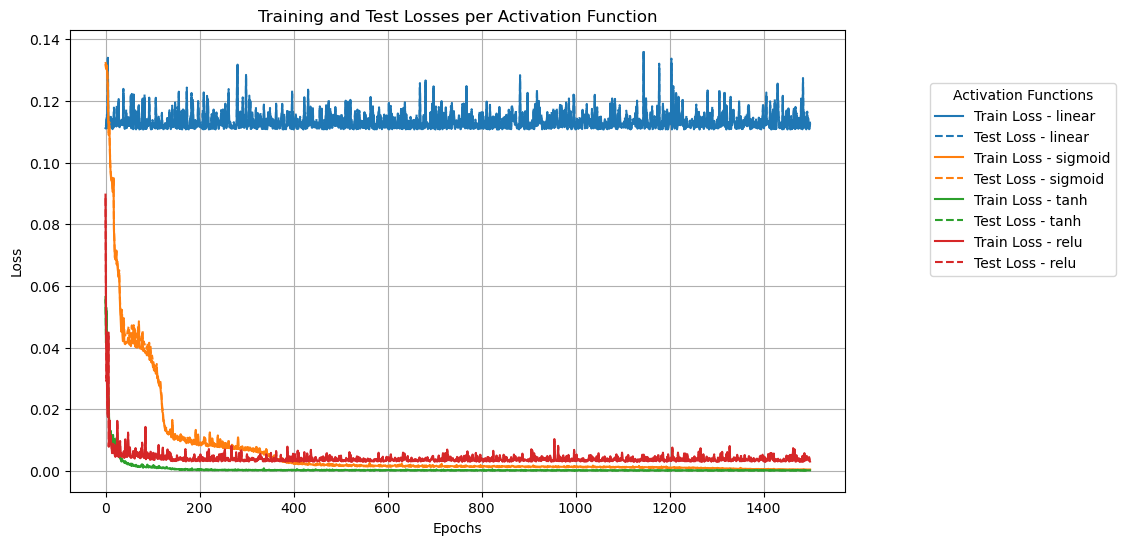

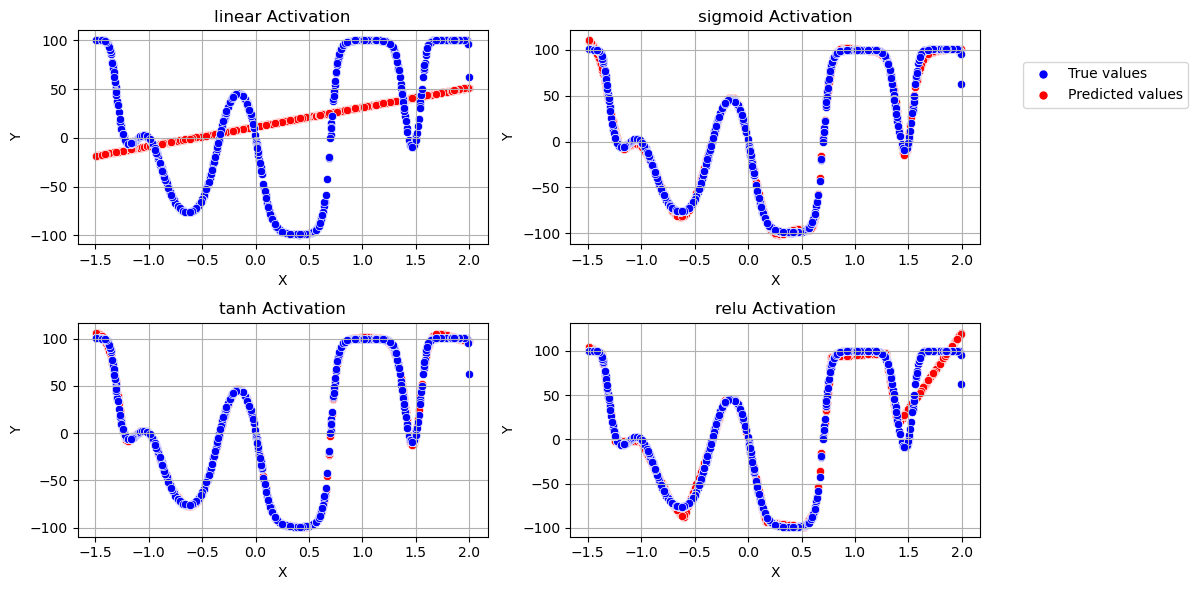

Regression Task Evaluation Metric per Activation Function


Training Time per Activation Function


In [47]:
print(f"Architecture with layers: {layers}")
visualize_results(task="regression", results=results, X_test=X_test_multimodal_large, Y_test=Y_test_multimodal_large)

Similar to the previous results, the tanh activation function achieved the best evaluation metrics, with sigmoid closely trailing behind. ReLU performed better compared to the previous two architectures, though it still faced difficulties in predicting the most irregular portion of the data. Once again, sigmoid exhibited the longest training time, taking approximately 60% longer than the other activation functions.

### Overview  
- **Deeper architectures** result in longer training times, but also better performance.  
- **Sigmoid** has the longest training time among all activation functions, with the differences becoming more pronounced as the architecture grows.  
- **Best performance** is achieved with the **tanh** activation function, where adding more layers leads to better results. A similar trend is observed for the **sigmoid** function.  
- **ReLU** benefits from deeper architectures, as additional hidden layers improve data approximation.  


#### Regression

#### steps large dataset

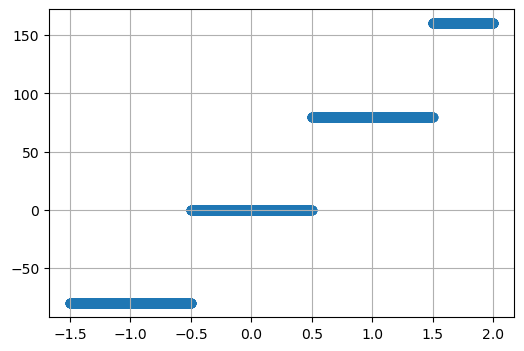

In [58]:
steps_large_training_path='data/steps-large-training.csv'
steps_large_test_path='data/steps-large-test.csv'

X_train_steps_large, Y_train_steps_large, X_test_steps_large, Y_test_steps_large=load_data(steps_large_training_path, steps_large_test_path, index_col=0)

plt.figure(figsize=(6, 4))
plt.grid(True)
plt.scatter(X_train_steps_large, Y_train_steps_large)

In [59]:
normalizer_steps_large = Normalizer()
X_train_steps_large_normalized, Y_train_steps_large_normalized = normalizer_steps_large.fit_transform(X_train_steps_large, Y_train_steps_large)
X_test_steps_large_normalized, Y_test_steps_large_normalized = normalizer_steps_large.transform(X_test_steps_large, Y_test_steps_large)

In [87]:
activations=['linear','sigmoid', 'tanh', 'relu']
#defining model parameters
task = 'regression'
layers = [1, 10,10, 10, 1]
epochs = 1000
batch_size = 32
learning_rate = 0.001
optimizer = 'RMSprop' #from nn3 performing better than momentum on steps large dataset
results = train_architecture_with_activation_functions(activations=activations, task=task, layers=layers, epochs=epochs, 
                                             batch_size=batch_size, learning_rate=learning_rate, optimizer=optimizer,
                                             X_train=X_train_steps_large_normalized, Y_train=Y_train_steps_large_normalized,
                                             X_test=X_test_steps_large_normalized, Y_test=Y_test_steps_large_normalized,
                                             data_normalized=True, normalizer=normalizer_steps_large)

Training architecture with linear
Training architecture with sigmoid
Training architecture with tanh
Training architecture with relu


Architecture with layers: [1, 10, 10, 10, 1]


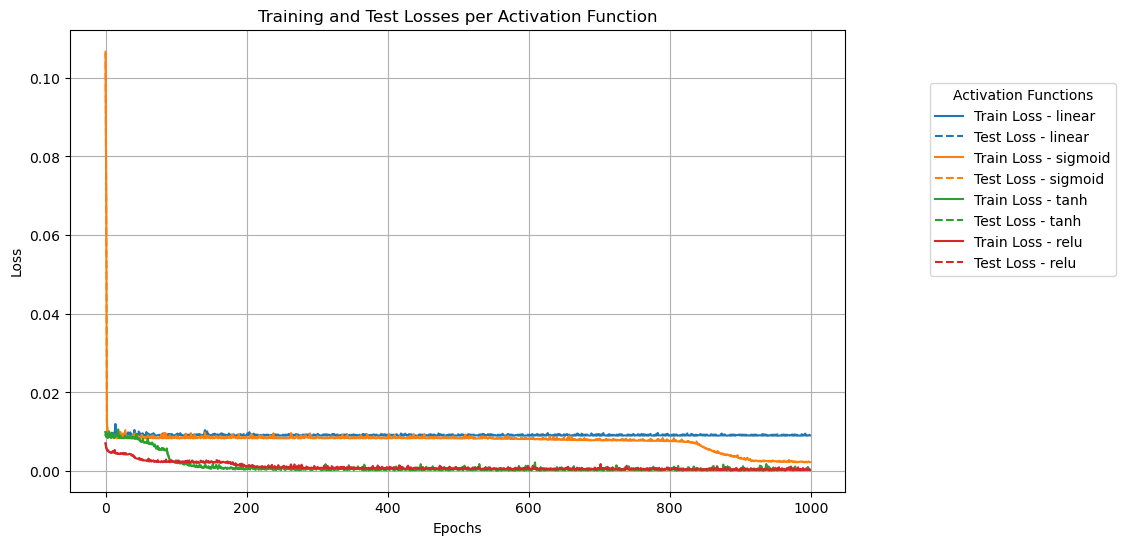

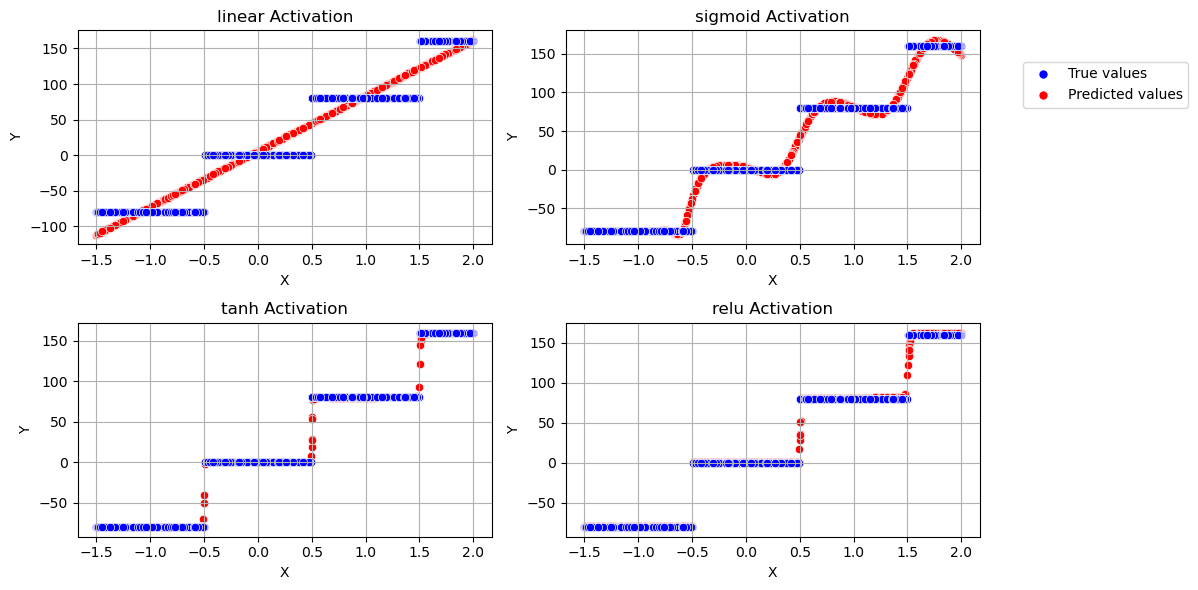

Regression Task Evaluation Metric per Activation Function


Training Time per Activation Function


In [88]:
print(f"Architecture with layers: {layers}")
visualize_results(task="regression", results=results, X_test=X_test_steps_large, Y_test=Y_test_steps_large)

The optimal architecture consists of 3 hidden layers, each containing 10 neurons, utilizing tanh or ReLU activation functions. This configuration achieves comparable performance across evaluations.

#### Best architectures
3 hidden layers with 10 neurons in each layer with tanh or relu activation function

#### Classification

#### rings5 regular dataset

In [101]:
rings5_training_path='data/rings5-regular-training.csv'
rings5_test_path='data/rings5-regular-test.csv'

X_train_rings5, Y_train_rings5, X_test_rings5, Y_test_rings5, num_classes =load_data_classification(rings5_training_path, rings5_test_path, encoding=True)

X_train_rings5[:4], Y_train_rings5[:4]

(array([[ 26.92612079, -16.58845064],
        [-77.43876749,  95.15946438],
        [-98.65009948,  94.92371385],
        [ 22.24118388,  -5.4476779 ]]),
 array([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]]))

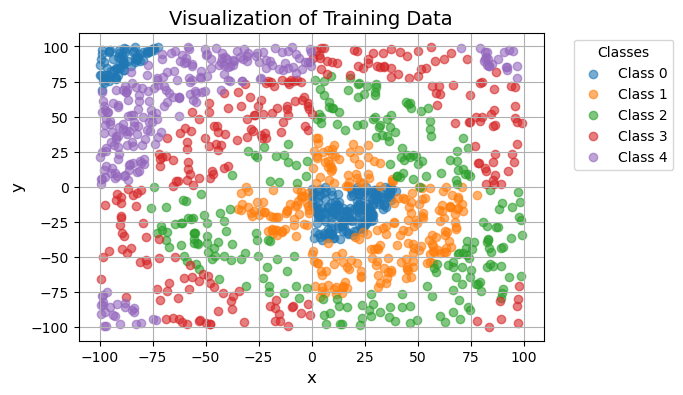

In [102]:
visualize_data_classification(X_train_rings5, Y_train_rings5, num_classes=num_classes)

In [138]:
activations=['linear','sigmoid', 'tanh', 'relu']
#defining model parameters
task = 'classification'
layers = [2, 20, num_classes]
epochs = 2000
batch_size = 32
learning_rate = 0.01
optimizer = 'RMSprop'
results = train_architecture_with_activation_functions(activations=activations, task=task, layers=layers, epochs=epochs, 
                                             batch_size=batch_size, learning_rate=learning_rate, optimizer=optimizer,
                                             X_train=X_train_rings5, Y_train=Y_train_rings5,
                                             X_test=X_test_rings5, Y_test=Y_test_rings5)

Training architecture with linear
Training architecture with sigmoid
Training architecture with tanh
Training architecture with relu


Architecture with layers: [2, 20, 5]


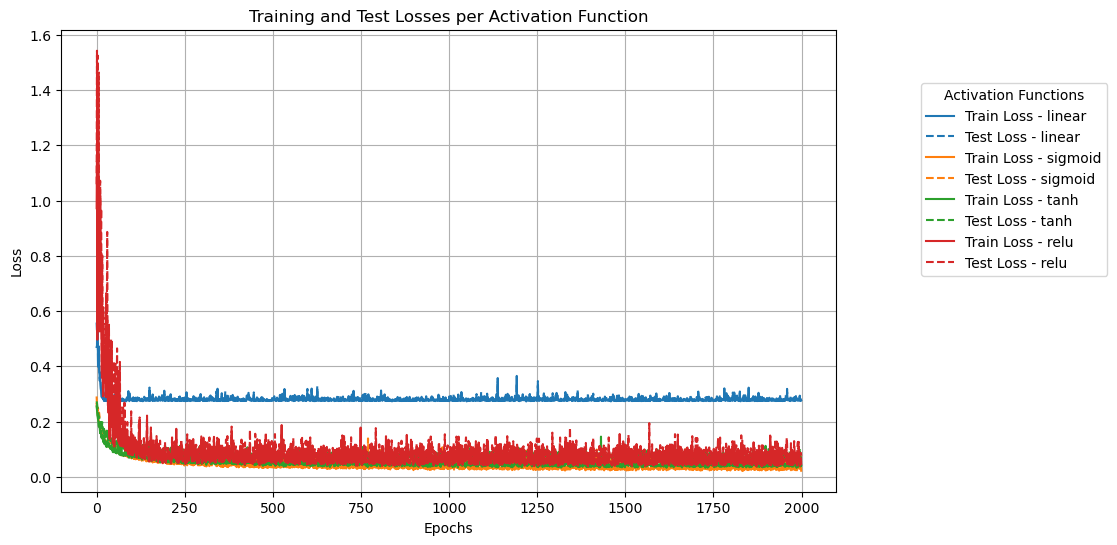

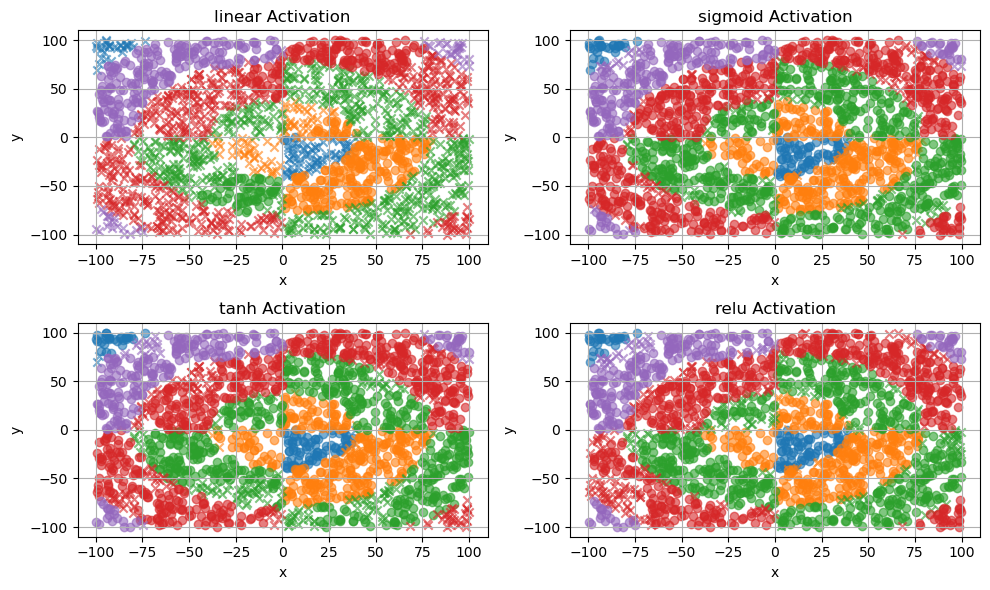

Classification Task Evaluation Metric per Activation Function


Training Time per Activation Function


In [139]:
print(f"Architecture with layers: {layers}")
visualize_results(results=results, task="classification", X_test=X_test_rings5, Y_test=Y_test_rings5, num_classes=num_classes)

Best performance for sigmoid activation fuction with 1 hidden layer with 20 neurons in layer.

Let's try deeper architecture with 5 neurons in each layer

In [152]:
#ommiting linear activatiom function
activations=['sigmoid', 'tanh', 'relu']
#defining model parameters
task = 'classification'
layers = [2, 20, 20, num_classes]
epochs = 2000
batch_size = 32
learning_rate = 0.01
optimizer = 'RMSprop'
results = train_architecture_with_activation_functions(activations=activations, task=task, layers=layers, epochs=epochs, 
                                             batch_size=batch_size, learning_rate=learning_rate, optimizer=optimizer,
                                             X_train=X_train_rings5, Y_train=Y_train_rings5,
                                             X_test=X_test_rings5, Y_test=Y_test_rings5)

Training architecture with sigmoid
Training architecture with tanh
Training architecture with relu


Architecture with layers: [2, 5, 5]


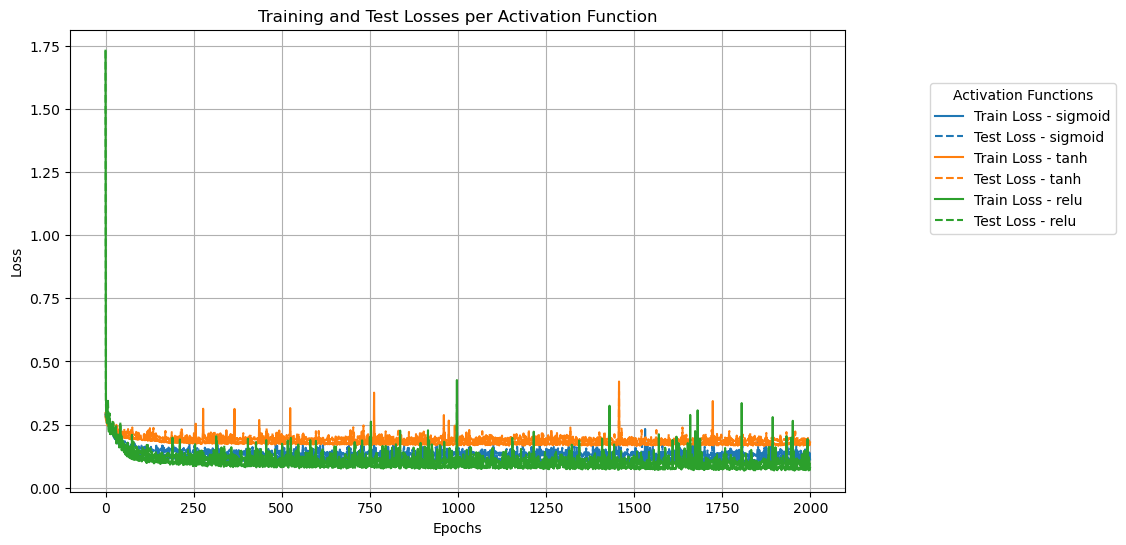

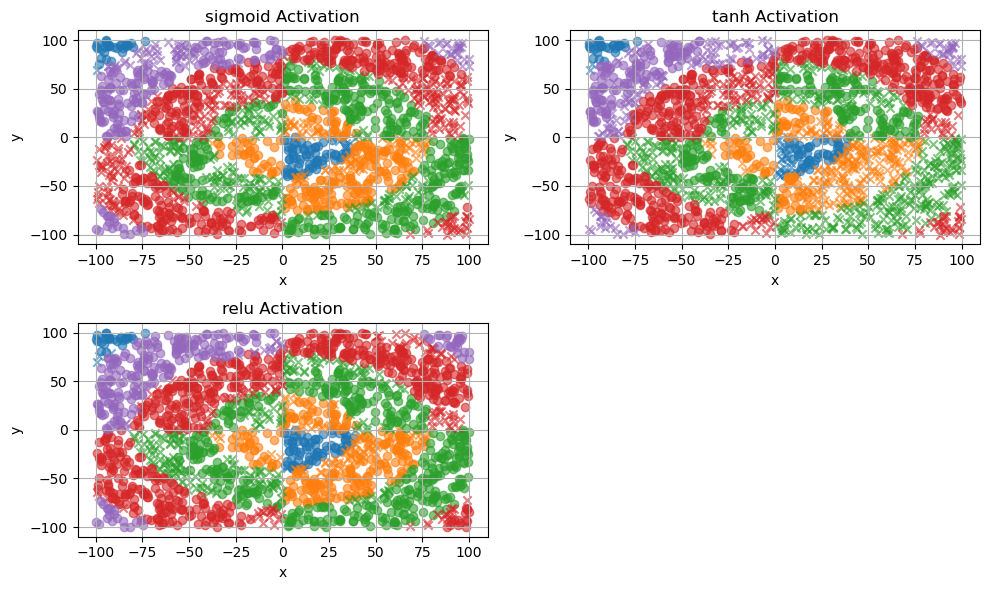

Classification Task Evaluation Metric per Activation Function


Training Time per Activation Function


In [ ]:
print(f"Architecture with layers: {layers}")
visualize_results(results=results, task="classification", X_test=X_test_rings5, Y_test=Y_test_rings5, num_classes=num_classes)

deeper architecture got worse results than architecture with only 1 hidden layer therefore we'll chceck if adding more neurons in architecture with 1 hidden layer makes substatial difference

In [159]:
#ommiting linear activatiom function
activations=['sigmoid', 'tanh', 'relu']
#defining model parameters
task = 'classification'
layers = [2, 50, num_classes]
epochs = 2000
batch_size = 32
learning_rate = 0.01
optimizer = 'RMSprop'
results = train_architecture_with_activation_functions(activations=activations, task=task, layers=layers, epochs=epochs, 
                                             batch_size=batch_size, learning_rate=learning_rate, optimizer=optimizer,
                                             X_train=X_train_rings5, Y_train=Y_train_rings5,
                                             X_test=X_test_rings5, Y_test=Y_test_rings5)

Training architecture with sigmoid
Training architecture with tanh
Training architecture with relu


Architecture with layers: [2, 50, 5]


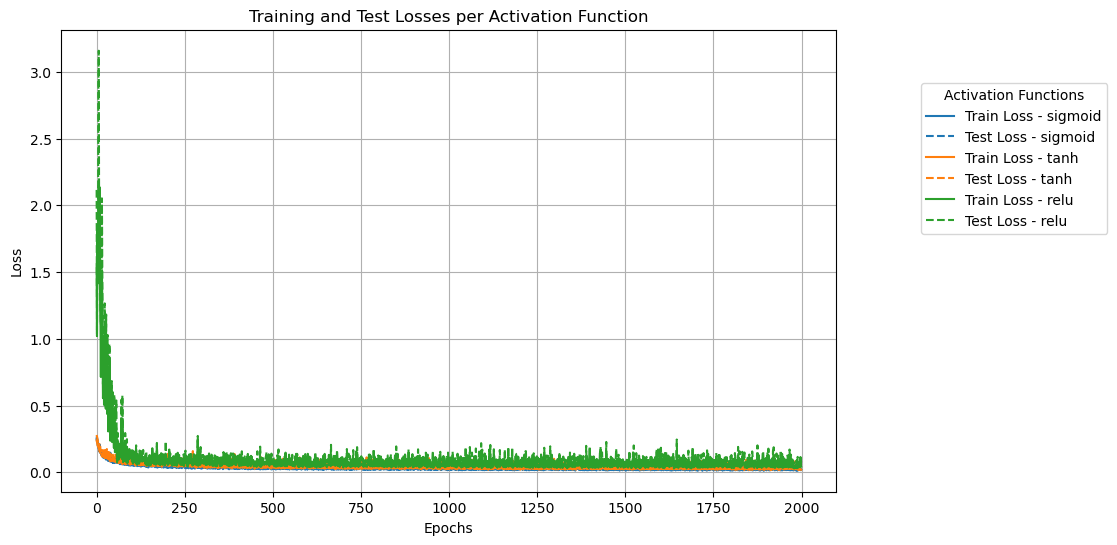

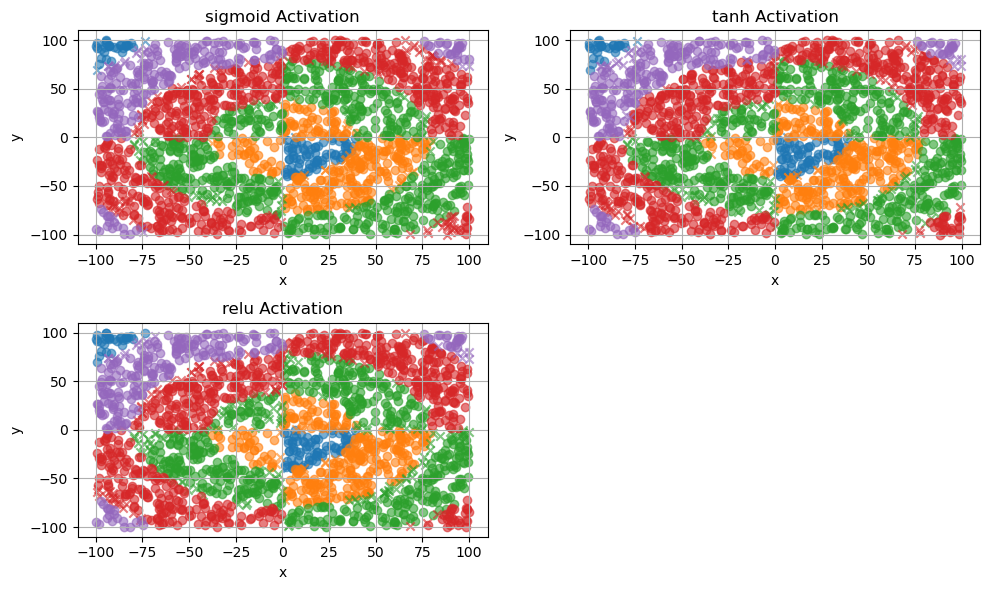

Classification Task Evaluation Metric per Activation Function


Training Time per Activation Function


In [160]:
print(f"Architecture with layers: {layers}")
visualize_results(results=results, task="classification", X_test=X_test_rings5, Y_test=Y_test_rings5, num_classes=num_classes)

A slight improvement in performance was observed for all activation functions, particularly for tanh, though this improvement required considerably more training time.

#### Best architectures
1 hidden layer with 20 neurons with sigmoid activation function

1 hidden layer with 50 neurons with tanh activation function

#### rings3 regular dataset

In [162]:
rings3_training_path='data/rings3-regular-training.csv'
rings3_test_path='data/rings3-regular-test.csv'

X_train_rings3, Y_train_rings3, X_test_rings3, Y_test_rings3, num_classes =load_data_classification(rings3_training_path, rings3_test_path, encoding=True)

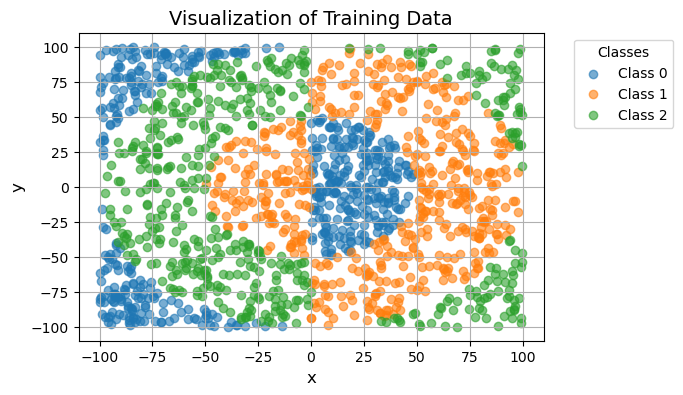

In [163]:
visualize_data_classification(X_train_rings3, Y_train_rings3, num_classes=num_classes)

trying 1 hidden layer architecture with 5 neurons

In [198]:
activations=['linear','sigmoid', 'tanh', 'relu']
#defining model parameters
task = 'classification'
layers = [2, 5, num_classes]
epochs = 2000
batch_size = 32
learning_rate = 0.001
optimizer = 'RMSprop'
results = train_architecture_with_activation_functions(activations=activations, task=task, layers=layers, epochs=epochs, 
                                             batch_size=batch_size, learning_rate=learning_rate, optimizer=optimizer,
                                             X_train=X_train_rings3, Y_train=Y_train_rings3,
                                             X_test=X_test_rings3, Y_test=Y_test_rings3)

Training architecture with linear
Training architecture with sigmoid
Training architecture with tanh
Training architecture with relu


Architecture with layers: [2, 5, 3]


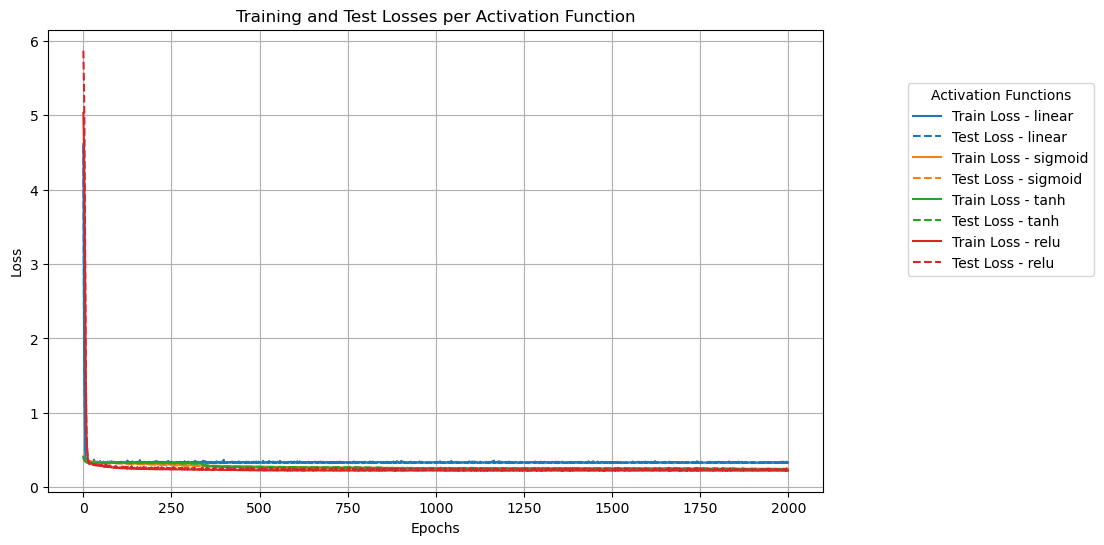

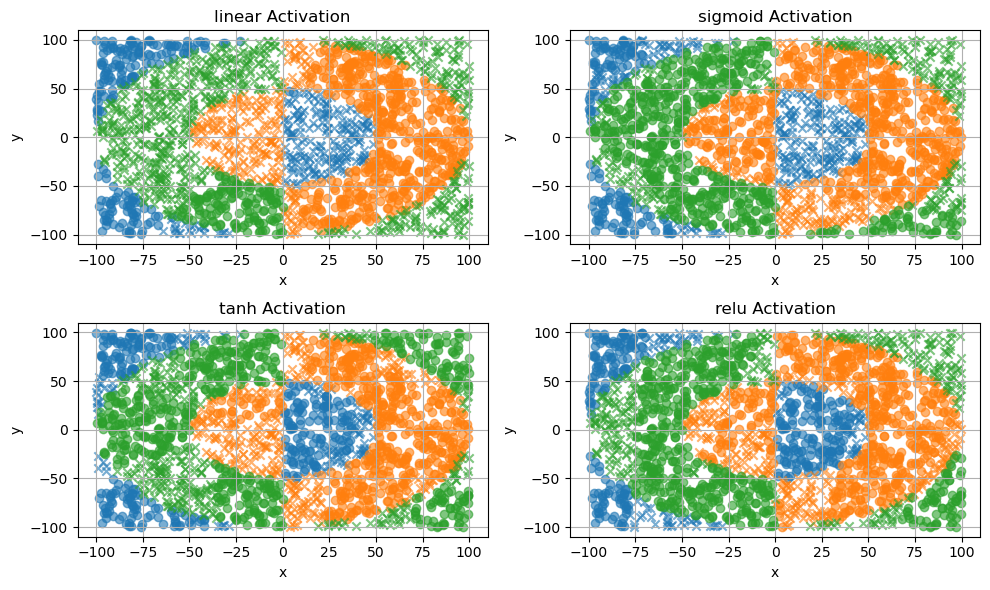

Classification Task Evaluation Metric per Activation Function


Training Time per Activation Function


In [199]:
print(f"Architecture with layers: {layers}")
visualize_results(results=results, task="classification", X_test=X_test_rings3, Y_test=Y_test_rings3, num_classes=num_classes)

same thing but with 2 hidden layers, 5 neurons in each layer

In [200]:
activations=['linear','sigmoid', 'tanh', 'relu']
#defining model parameters
task = 'classification'
layers = [2, 5,5, num_classes]
epochs = 2000
batch_size = 32
learning_rate = 0.001
optimizer = 'RMSprop'
results = train_architecture_with_activation_functions(activations=activations, task=task, layers=layers, epochs=epochs, 
                                             batch_size=batch_size, learning_rate=learning_rate, optimizer=optimizer,
                                             X_train=X_train_rings3, Y_train=Y_train_rings3,
                                             X_test=X_test_rings3, Y_test=Y_test_rings3)

Training architecture with linear
Training architecture with sigmoid
Training architecture with tanh
Training architecture with relu


Architecture with layers: [2, 5, 5, 3]


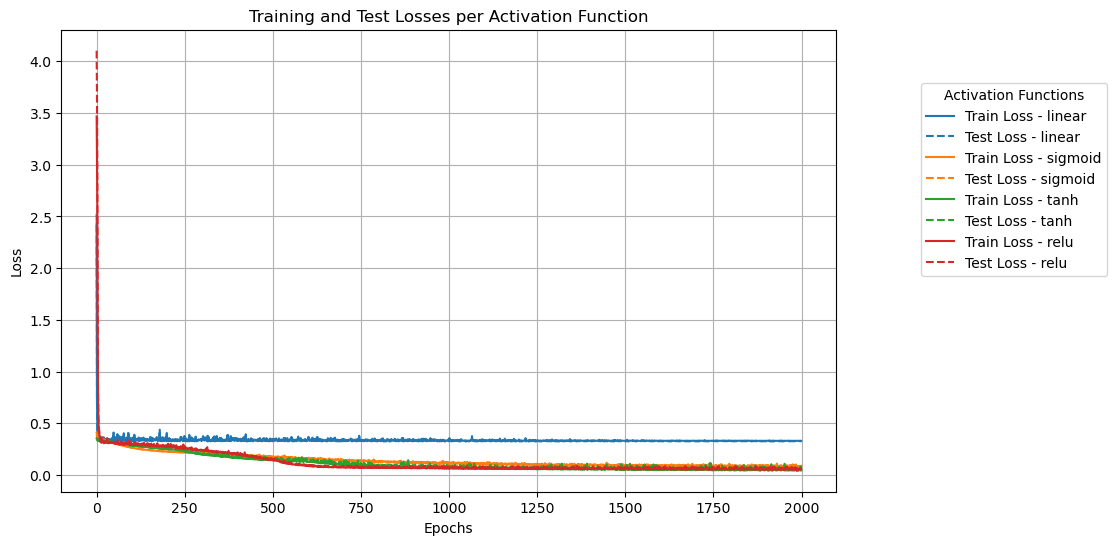

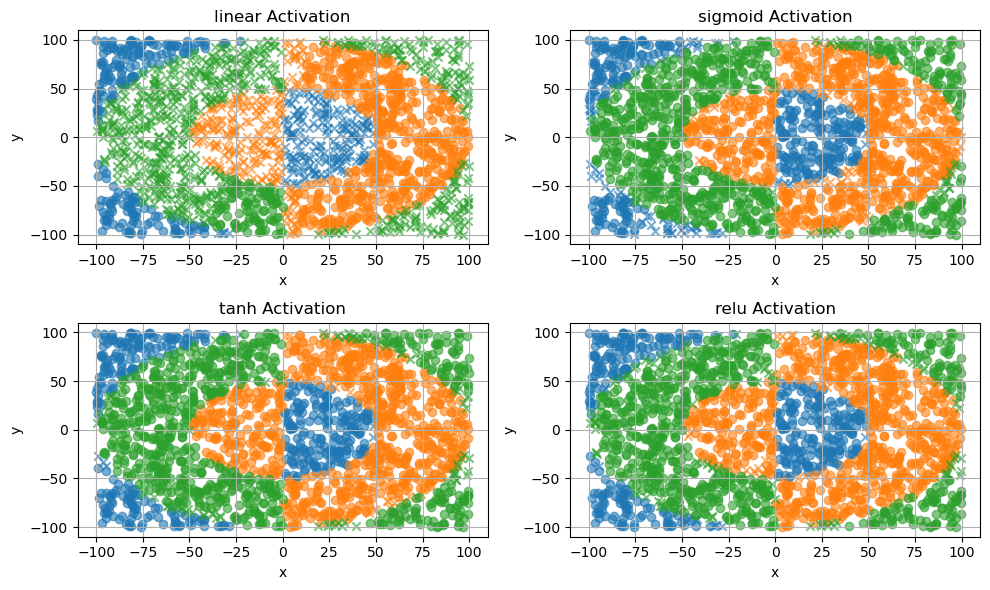

Classification Task Evaluation Metric per Activation Function


Training Time per Activation Function


In [201]:
print(f"Architecture with layers: {layers}")
visualize_results(results=results, task="classification", X_test=X_test_rings3, Y_test=Y_test_rings3, num_classes=num_classes)

To improve performance across all activation functions, we experimented with a deeper architecture, increasing the number of hidden layers to 3 while keeping five neurons in each layer.

In [202]:
activations=['linear','sigmoid', 'tanh', 'relu']
#defining model parameters
task = 'classification'
layers = [2, 5,5,5, num_classes]
epochs = 2000
batch_size = 32
learning_rate = 0.001
optimizer = 'RMSprop'
results = train_architecture_with_activation_functions(activations=activations, task=task, layers=layers, epochs=epochs, 
                                             batch_size=batch_size, learning_rate=learning_rate, optimizer=optimizer,
                                             X_train=X_train_rings3, Y_train=Y_train_rings3,
                                             X_test=X_test_rings3, Y_test=Y_test_rings3)

Training architecture with linear
Training architecture with sigmoid
Training architecture with tanh
Training architecture with relu


Architecture with layers: [2, 5, 5, 5, 3]


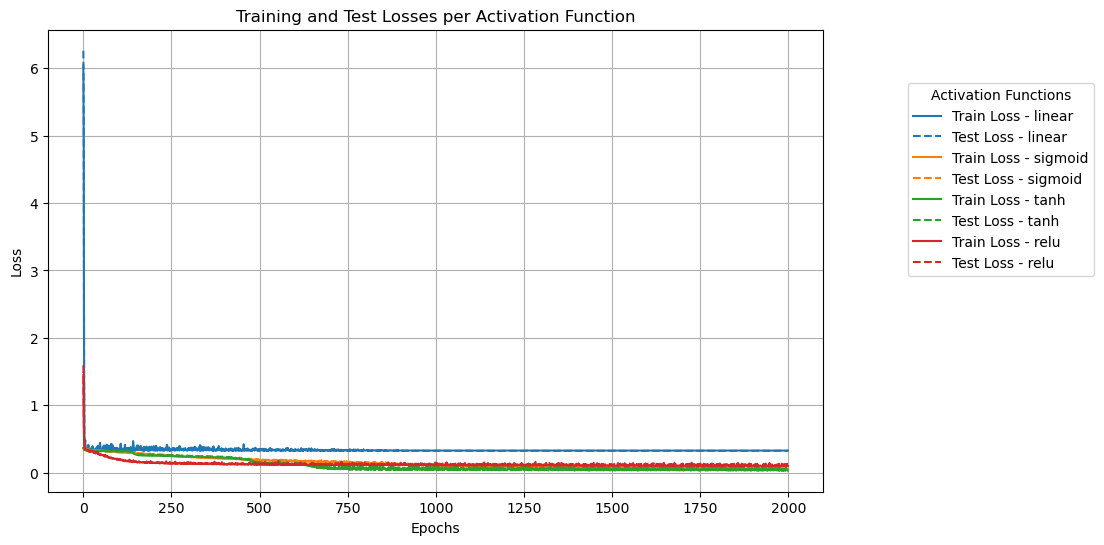

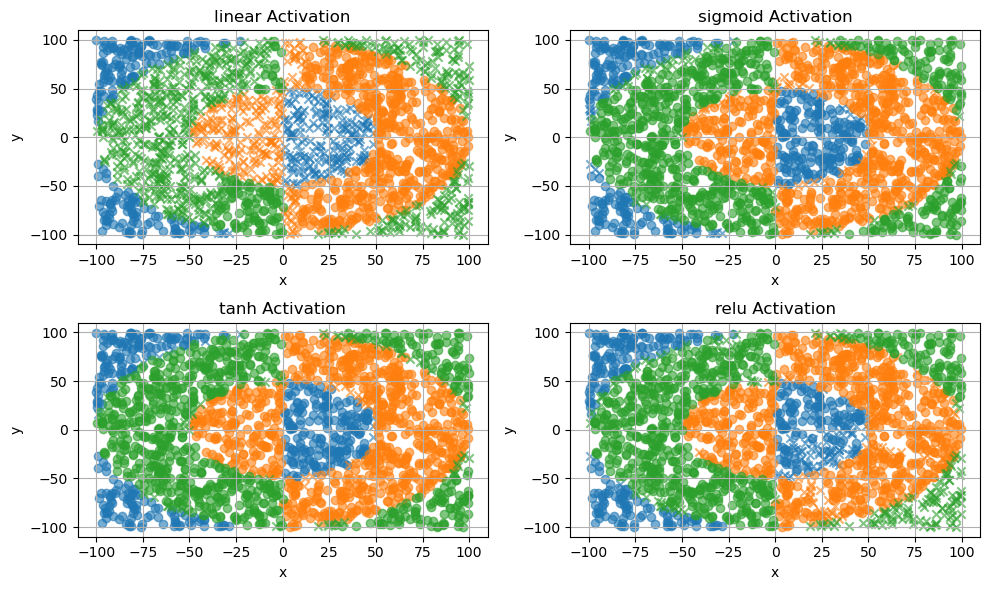

Classification Task Evaluation Metric per Activation Function


Training Time per Activation Function


In [203]:
print(f"Architecture with layers: {layers}")
visualize_results(results=results, task="classification", X_test=X_test_rings3, Y_test=Y_test_rings3, num_classes=num_classes)

The relu activation function exhibited signs of overfitting, while sigmoid and tanh achieved the best performance. To further improve the model, we tested a deeper architecture with three hidden layers, this time using 10 neurons in each layer.

In [206]:
activations=['sigmoid', 'tanh', 'relu']
#defining model parameters
task = 'classification'
layers = [2, 10, 10, 10, num_classes]
epochs = 2000
batch_size = 32
learning_rate = 0.0001
optimizer = 'RMSprop'
results = train_architecture_with_activation_functions(activations=activations, task=task, layers=layers, epochs=epochs, 
                                             batch_size=batch_size, learning_rate=learning_rate, optimizer=optimizer,
                                             X_train=X_train_rings3, Y_train=Y_train_rings3,
                                             X_test=X_test_rings3, Y_test=Y_test_rings3)

Training architecture with sigmoid
Training architecture with tanh
Training architecture with relu


Architecture with layers: [2, 10, 10, 10, 3]


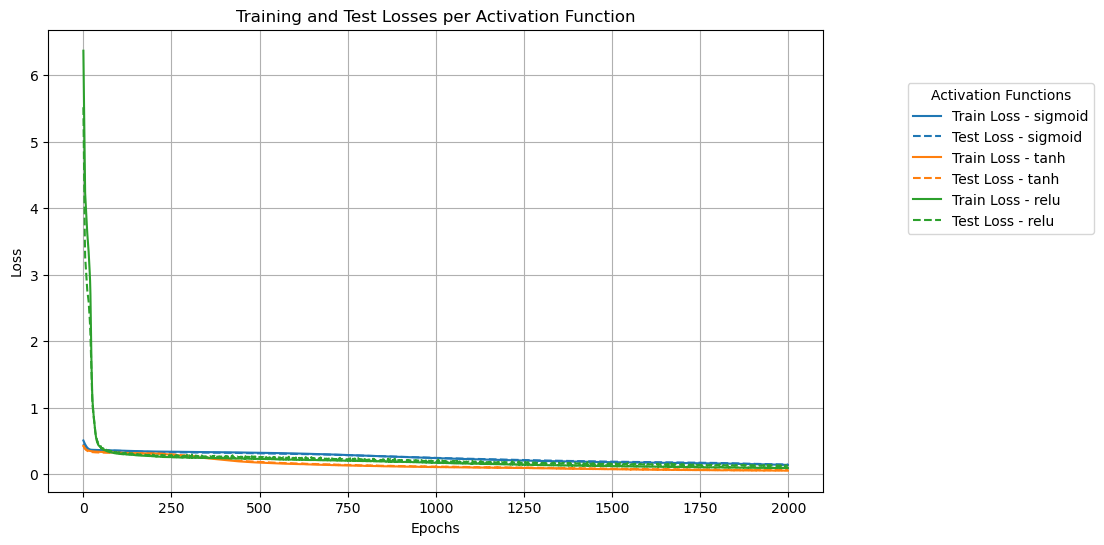

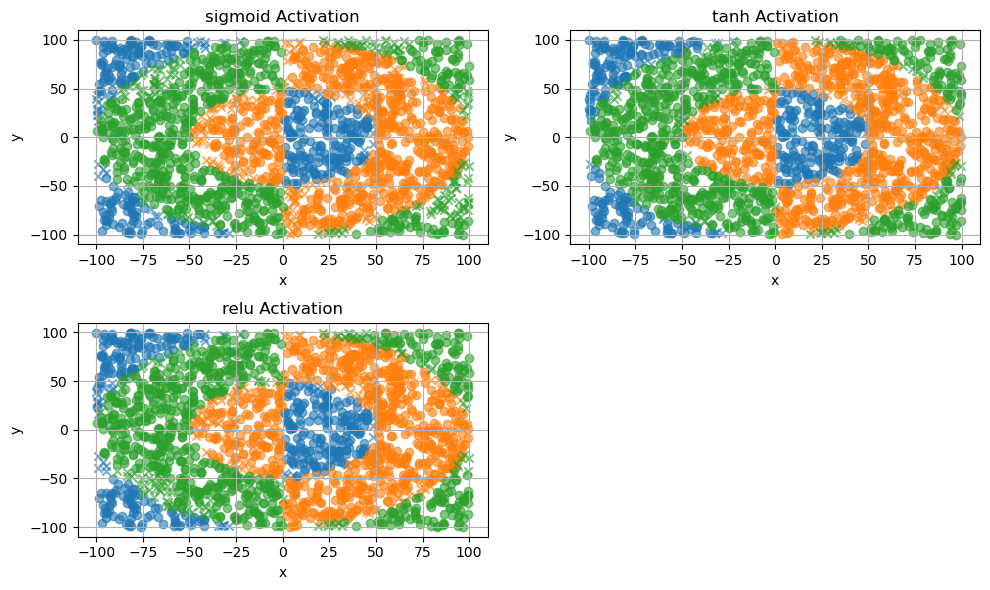

Classification Task Evaluation Metric per Activation Function


Training Time per Activation Function


In [207]:
print(f"Architecture with layers: {layers}")
visualize_results(results=results, task="classification", X_test=X_test_rings3, Y_test=Y_test_rings3, num_classes=num_classes)

As no prediction improvement was observed, we maintained the three-hidden-layer architecture (five neurons per layer) with tanh and sigmoid activations, which also offered shorter training durations.

### Summary best architectures
#### Steps Large Dataset
- **3 hidden layers**, **10 neurons** in each layer  
  - Activation function: **Tanh**  
- **3 hidden layers**, **10 neurons** in each layer  
  - Activation function: **ReLU**  

#### Rings5 Regular Dataset  
- **1 hidden layer**, **20 neurons**  
  - Activation function: **Sigmoid**  
- **1 hidden layer**, **50 neurons**  
  - Activation function: **Tanh**  

#### Rings3 Regular Dataset  
- **3 hidden layers**, **5 neurons** in each layer  
  - Activation function: **Tanh**  
- **3 hidden layers**, **5 neurons** in each layer  
  - Activation function: **Sigmoid**  